In [276]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import os 

**Filip Gacek gr. IIa**

In [277]:
path = os.getcwd() + '/ex1data1.txt'
data = pd.read_csv(path, header=None, names=['Population', 'Profit'])
df = pd.DataFrame(data)

In [278]:
data.head

<bound method NDFrame.head of     Population    Profit
0       6.1101  17.59200
1       5.5277   9.13020
2       8.5186  13.66200
3       7.0032  11.85400
4       5.8598   6.82330
..         ...       ...
92      5.8707   7.20290
93      5.3054   1.98690
94      8.2934   0.14454
95     13.3940   9.05510
96      5.4369   0.61705

[97 rows x 2 columns]>

In [279]:
data.describe()

,Population,Profit
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


<Figure size 648x432 with 0 Axes>

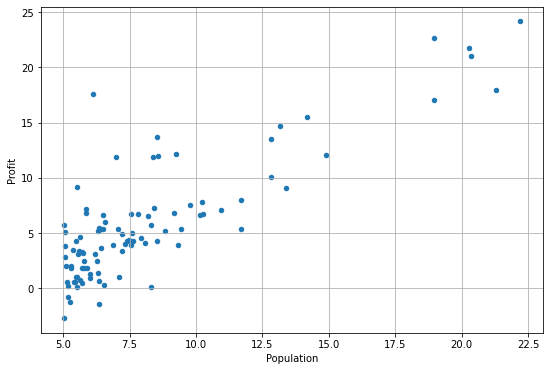

In [280]:
plt.figure(figsize=[9, 6], num=1)
df.plot(x='Population', y='Profit', kind='scatter', grid=True, figsize=[9, 6])
plt.show()

In [282]:
X, y = np.matrix(df['Population']).T,  np.matrix(df['Profit'])
X.shape
theta = np.matrix(np.array([0, 0], dtype=np.float64))
X = np.concatenate((np.matrix(np.ones(X.shape)), X), axis=1).T
y.shape
X.shape

(2, 97)

In [283]:
#Ex 5/6 
def computeCost(X: np.matrix, y: np.matrix, theta: np.matrix) -> float:
    if X.shape[1] != y.shape[1]:
        raise ValueError("Data prepared wrongly. Repair it.")
    else:
        m = X.shape[1]
        cost = np.sum(1/(2*m) * np.power((theta * X - y), 2))
        return cost
computeCost(X, y, theta)

32.07273387745567

In [284]:
#Ex 7
def simple_gradient(X: np.matrix, y:np.matrix, theta:np.matrix, alpha:float=0.01, it:int=1000) -> tuple:
    i = 0
    m = X.shape[1]
    costs = [computeCost(X, y, theta)]

    while i < it:
        theta_old = theta    
        theta[0, 0] = theta[0, 0] - alpha * 1/m * np.sum((theta_old * X - y))
        theta[0, 1] = theta[0, 1] - alpha * 1/m * np.sum((theta_old * X - y) * X.T)
        costs.append(computeCost(X, y, theta))
        i += 1
    return theta, costs


In [285]:
#Ex 8
theta_opt, costs = simple_gradient(X, y, theta, 0.01)
theta_opt

matrix([[-3.13719865,  1.11543748]])

In [286]:
#Ex 9
costs[-1]

4.529457259097518

In [287]:
#Ex 10
b, a = float(theta_opt[0,0]), float(theta_opt[0, 1])
x_s = np.arange(0, 25, 0.1)
y_s = a * x_s + b

<Figure size 648x432 with 0 Axes>

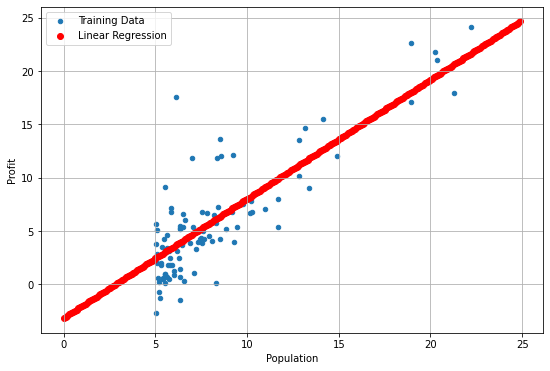

In [288]:
#Ex 10
plt.figure(num=2, figsize=[9, 6])
df.plot(x='Population', y='Profit', kind='scatter', grid=True, figsize=[9, 6])
plt.scatter(x_s, y_s, color='r')
plt.legend(["Training Data", "Linear Regression"])
plt.show()

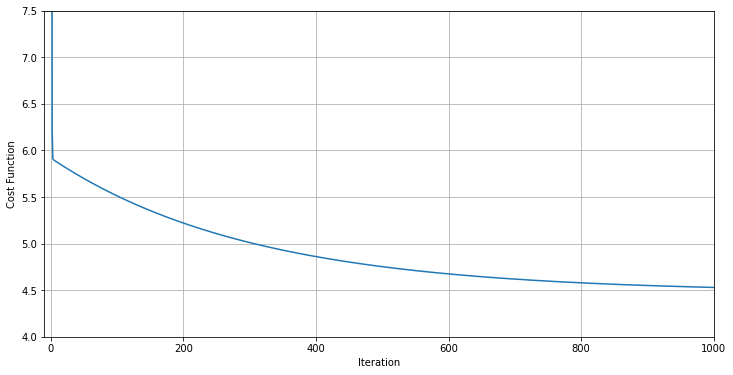

In [289]:
# Ex 11
x_s2 = np.arange(1, len(costs)+1)

plt.figure(num=3, figsize=[12, 6])
plt.plot(x_s2, costs)
plt.xlabel("Iteration")
plt.ylabel("Cost Function")
plt.axis([-10, 1000, 4, 7.5])
plt.grid()
plt.show()

**Part II**


In [290]:
from sklearn.model_selection import train_test_split
path = os.getcwd() + '/ex1data2.txt'
data2 = pd.read_csv(path, header=None, names=['Size', 'Bedrooms', 'Price'])
data_train, data_test = train_test_split(data2, test_size=0.3, random_state=42)

data_train = (data_train - data_train.mean())/data_train.std() #normalizacja
data_train.head()
df2 = pd.DataFrame(data_train)
data_train.insert(loc=0, column="ones", value=1)

In [291]:
data_train.describe()

,ones,Size,Bedrooms,Price
count,32.0,3.200000e+01,3.200000e+01,3.200000e+01
mean,1.0,2.775558e-17,-2.775558e-17,2.775558e-17
std,0.0,1.000000e+00,1.000000e+00,1.000000e+00
min,1.0,-1.465200e+00,-2.666158e+00,-1.322407e+00
25%,1.0,-6.508080e-01,-2.628606e-01,-6.344428e-01
50%,1.0,-8.744738e-02,-2.628606e-01,-1.794631e-01
75%,1.0,2.959103e-01,9.387879e-01,2.410085e-01
max,1.0,3.238878e+00,2.140436e+00,3.337288e+00


Text(0.5, 0, 'Price')

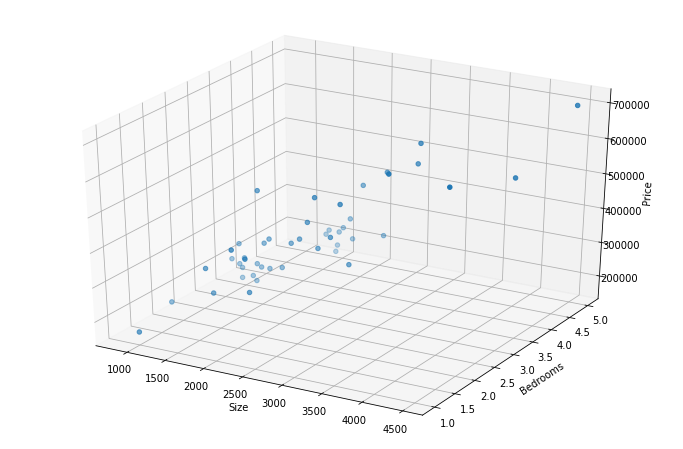

In [292]:
from mpl_toolkits import mplot3d
%matplotlib inline
fig = plt.figure(figsize=[12, 8])
ax = plt.axes(projection='3d')
x2 = np.array(data2['Size'])
y2 =np.array(data2['Bedrooms'])
z2 = np.array(data2['Price'])
ax.scatter3D(x2, y2, z2)
ax.set_xlabel('Size')
ax.set_ylabel('Bedrooms')
ax.set_zlabel('Price')

In [293]:
X_train, Y_train = np.matrix(df2.iloc[: , :3]), np.matrix(df2.iloc[:, 3])
theta2 = np.matrix(np.zeros(X_train.shape[1]), dtype=np.float64)
theta2

matrix([[0., 0., 0.]])

In [294]:
# Ex 5
computeCost = lambda X, y, theta: 1/(2*X.shape[0]) * np.sum(np.square(theta @ X.T - y))

In [295]:
#Ex 6 
computeCost(X_train, Y_train, theta2)

0.484375

In [296]:
#ex7
def simple_gradient(X, y, theta, alpha: float=0.01, it: int=10000):
    costs = [computeCost(X, y, theta)]
    i= 0
    while i < it:
        h = theta @ X.T
        m = X.shape[0]
        theta = theta - (alpha / m) * np.sum((h - y) * X, axis=0)
        costs.append(computeCost(X, y, theta))
        i += 1

    return theta, costs

In [297]:
#Ex8_9
theta_opt2, costs2 = simple_gradient(X_train, Y_train, theta2, 0.01)
theta_opt2

matrix([[ 2.43034759e-17,  8.88612371e-01, -2.06708031e-02]])

In [298]:
costs2[-1]

0.11296514498953532

In [299]:
#Ex 9
a, b, c = float(theta_opt2[0,0]), float(theta_opt2[0, 1]), float(theta_opt2[0, 2])
x_s2 = np.arange(-1, 4, 0.01)
x2_s2 = np.arange(-1, 2, 0.01)

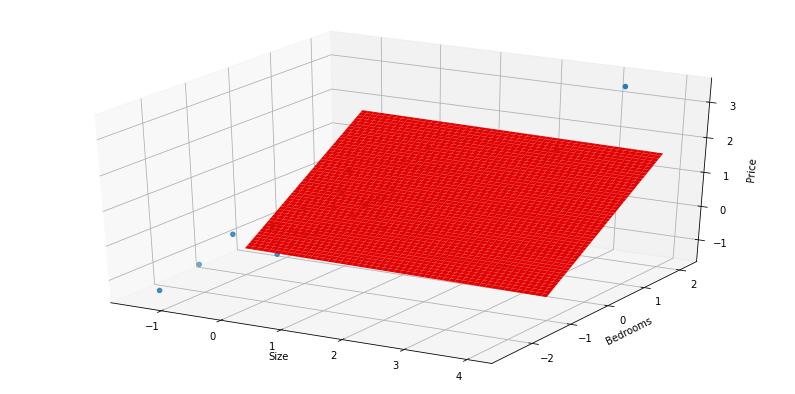

In [300]:
#ex10
fig = plt.figure(figsize=[14, 7])
ax = plt.axes(projection='3d')
x2 = np.array(x_s2)
y2 =np.array(x2_s2)
X2, Y2 = np.meshgrid(x2, y2)
Z2 = (X2 * theta_opt2[0, 2] + Y2*theta_opt2[0, 1] + theta_opt2[0, 0])
ax.plot_surface(X2, Y2, Z2, color='r')
ax.scatter3D(np.array(X_train[:, 1]), np.array(X_train[:, 2]), np.array(Y_train), marker='o')
ax.set_xlabel('Size')
ax.set_ylabel('Bedrooms')
ax.set_zlabel('Price')
plt.show()

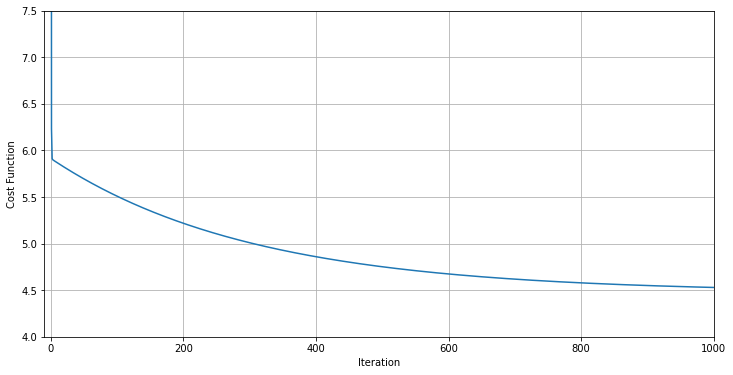

In [301]:
# Ex 11
x_s2 = np.arange(1, len(costs)+1)

plt.figure(num=3, figsize=[12, 6])
plt.plot(costs)
plt.xlabel("Iteration")
plt.ylabel("Cost Function")
plt.axis([-10, 1000, 4, 7.5])
plt.grid()
plt.show()

**Linear Regression - Python Packages**

In [302]:
from sklearn import datasets, linear_model
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [303]:
# Data Import
boston = datasets.load_boston()
boston_X = boston.data
boston_Y = boston.target
scaler = StandardScaler()

boston_X = scaler.fit_transform(boston.data,  boston.target)
X_train, X_test, Y_train, Y_test = train_test_split(boston_X, boston_Y, test_size=0.3, random_state=20)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [304]:
regr = linear_model.LinearRegression()
regr.fit(X_train, Y_train)
Y_predicted = regr.predict(X_test)

print('Coefficients: \n', regr.coef_)
error = np.mean((regr.predict(X_test) - Y_test) ** 2)
print("Residual sum of squares: {}".format(error))

Coefficients: 
 [-0.53216871  0.65514743  0.25139889  0.53386867 -2.35405414  3.22769102
  0.26765409 -2.64142173  1.98038739 -1.72514694 -1.8506093   0.85389921
 -3.25138407]
Residual sum of squares: 25.393200158591622


In [305]:
def regression(i, reg):
  return reg.intercept_ + reg.coef_[i] * boston_X[:, i]

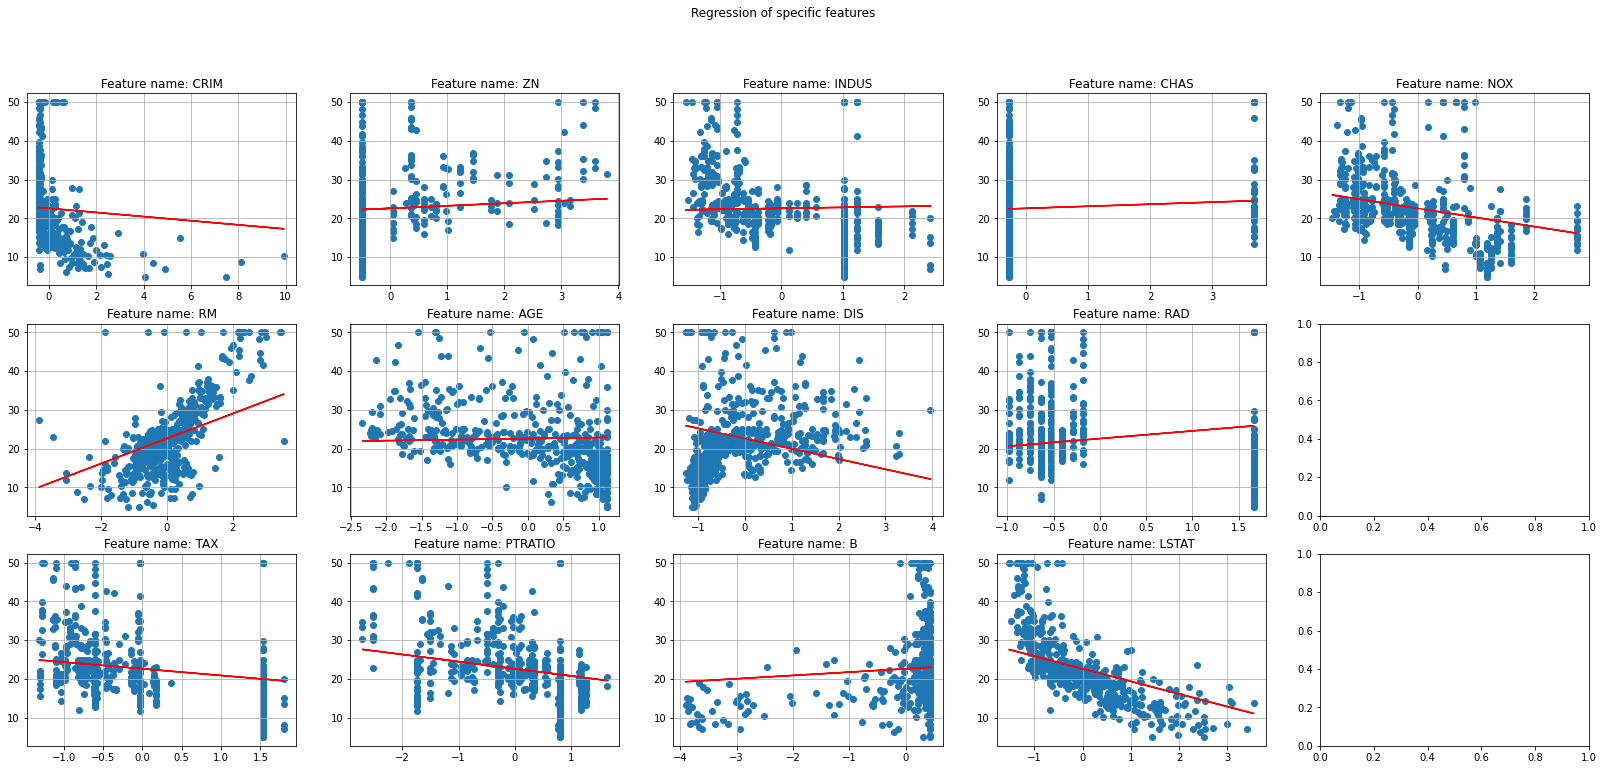

In [306]:
fig, ax = plt.subplots(3, 5, figsize=[28, 12])
fig.suptitle("Regression of specific features")
j = 0
k = 0
for i in range(boston.data.shape[1]):
    feature = boston_X[:, i]
    ax[j][k].scatter(feature, boston_Y)
    ax[j][k].plot(feature, regression(i, regr), c='red')
    ax[j][k].set_title(f'Feature name: {boston.feature_names[i]}')
    ax[j][k].grid()
    if i % 4 == 0 and i != 0:
      j += 1
      k = 0
    else:
      k+=1
plt.show()

In [307]:
reg_LinReg = linear_model.LinearRegression()
reg_Ridge = linear_model.Ridge(alpha = .5)
reg_Lasso = linear_model.Lasso(alpha = 5.1)
reg_ElNet = linear_model.ElasticNet(alpha = .5, l1_ratio=0.5)
models = [reg_LinReg, reg_Ridge, reg_Lasso, reg_ElNet]

In [308]:
from sklearn.metrics import mean_squared_error
predictions = list()
mses = list()

for model in models: 
  model.fit(X_train, Y_train)
  predictions.append(model.predict(X_test))
  mses.append(mean_squared_error(Y_test, model.predict(X_test)))

for i in range(4):
  print(models[i])
  print(f'Mean Squared Error: {mses[i]}')

LinearRegression()
Mean Squared Error: 25.393200158591622
Ridge(alpha=0.5)
Mean Squared Error: 25.425089982939074
Lasso(alpha=5.1)
Mean Squared Error: 64.44212200365115
ElasticNet(alpha=0.5)
Mean Squared Error: 31.803531798243444
